In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# **Problem #2**

>Online version: 
>
>[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/edsaac/GouyChapman/master?filepath=Saavedra_hw2_p2.ipynb)

## **2. Copper adsorption onto HFO**

**Copper adsoprtion to  ▒FeOOH**

\begin{equation}
\begin{array}{rclc|r}
\text{Reaction} & & & \log K & \text{Id.}\\
\hline
\rm ░FeOOH + H^+ &\rightleftharpoons& \rm ░FeOOH_2^+ & 7.5 & 1\\
\rm ░FeOOH &\rightleftharpoons& \rm ░FeOO^- + H^+ & -10.2 & 2\\
\rm ░FeOOH + Cu_{aq}^{2+} &\rightleftharpoons& \rm ░FeOOCu^+ + H^+ & 0.98 & 3\\
\end{array}
\end{equation}

Besides the reactions above, the complexation of copper with the other ligands in solution has to be considered in order to get the full picture of the system. The followind data was retrieved from http://jess.murdoch.edu.au/rawrxnbiny.shtml.

**Complexation of Cu with carbonate ions**

\begin{equation}
\begin{array}{rclc|rr}
\text{Reaction} & & & \log K & \text{Ref.} & \text{Id.}\\
\hline
\rm Cu^{2+} + CO_3^= &\rightleftharpoons& \rm CuCO_3 & 6.73 & \text{MSL[498]} & 1324-3\\
\rm Cu^{+2} + CO_3^= + H^+ &\rightleftharpoons& \rm CuHCO_3^+ & 12.13 & \text{EDH[5390]} & 1326-1\\
\rm Cu^{2+} + 2CO_3^= &\rightleftharpoons& \rm Cu(CO_3)_2^{2-} & 9.83 & \text{MSL[498]} & 1325-4\\
\rm CuCO_3 + CO_3^= &\rightleftharpoons& \rm Cu(CO_3)_2^{2-} & 3.10 & \text{MSL[498]} & 75968-2\\
\rm Cu^{2+} + 3CO_3^= &\rightleftharpoons& \rm Cu(CO_3)_3^{4-} & 10.5 & \text{EAE[]<} & 53520-2\\
\rm Cu^{2+} + HCO_3^- &\rightleftharpoons& \rm CuHCO_3^+ & 1.84 & \text{CRV[22484]} & 2789-2\\
\rm Cu^{2+} + 2HCO_3^- &\rightleftharpoons& \rm Cu(HCO_3)_2 & 6.6 & \text{EES[]<} & 54842-2\\
\end{array}
\end{equation}

**Complexation of Cu with nitrate ions**

\begin{equation}
\begin{array}{rclc|rr}
\text{Reaction} & & & \log K & \text{Ref.} & \text{Id.}\\
\hline
\rm Cu^{2+} + NO_3^- &\rightleftharpoons& \rm CuNO_3^+ & 0.54 & \text{CRV[8789]} & 2799-2\\
\rm Cu^{2+} + 2NO_3^- &\rightleftharpoons& \rm Cu(NO_3)_2 & 0.39 & \text{CRV[8789]} & 2800-2\\
\rm Cu^{2+} + 3NO_3^- &\rightleftharpoons& \rm Cu(NO_3)_3^- & -1.20 & \text{CRV[8789]} & 54807-2\\
\end{array}
\end{equation}

**Complexation of Cu with hydroxyl ions**

\begin{equation}
\begin{array}{rclc|rr}
\text{Reaction} & & & \log K & \text{Ref.} & \text{Id.}\\
\hline
\rm Cu^{2+} + OH^- &\rightleftharpoons& \rm CuOH^+ & 6.5 & \text{MPH[5481]} & 140-3\\
\rm Cu^{2+} + 2OH^- &\rightleftharpoons& \rm Cu(OH)_2 & 11.8 & \text{MPH[5481]} & 141-2\\
\rm 2Cu^{2+} + 2OH^- &\rightleftharpoons& \rm Cu_2(OH)_2^{2+} & 17.2 & \text{MGL[5398]} & 142-3\\
\end{array}
\end{equation}

************
$\boxed{\text{First, let's consider a mixture of Cu$^{2+}$, NaHCO$_3$ and KNO$_3$}}$

**Recipe**
- TOT$_{\rm Cu^{2+}}$ = $2.5\times 10^{-7}$ M
- [NaHCO$_3$] = $1.0\times 10^{-3}$ M
- [KNO$_3$] = $1.0\times 10^{-3}$ M

**Matrix used in ChemEQL**

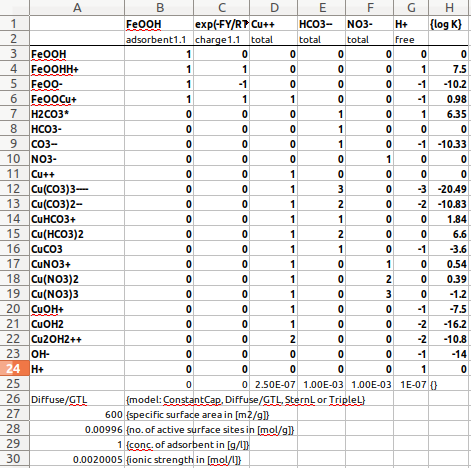

This matrix is imported to ChemEQL and it's solved for a range of pH from 2 to 10. The results of the calculation are exported to a text file which is read by the following piece of code.

In [2]:
#Read the results of the ChemEQL calculations
Full_Results = pd.read_csv("./ResultsAdsorption.xls",sep="\t");
pH = Full_Results['-log H+']

### **2.1 Surface sites**

The first thing to check will be the state of the adsorption sites in the system. It is to notice that the total number of available sites is much greater than the amount of copper in the system, thus, the adsorption of copper will not be hindered by the saturation of the HFO. 

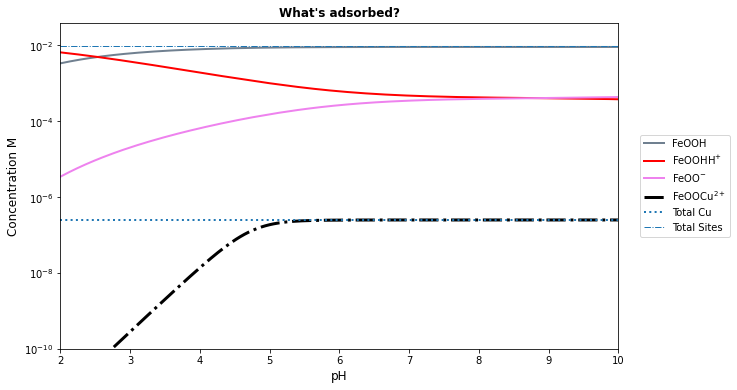

In [3]:
# Initialize plot for surface sites "speciation"
plt.figure(figsize=(10,6),facecolor="white")
plt.plot(pH,Full_Results['FeOOH'],label="FeOOH",lw=2,c='slategray') #Neutral HFO
plt.plot(pH,Full_Results['FeOOHH+'],label="FeOOHH$^{+}$",lw=2,c='red') #Protonated HFO
plt.plot(pH,Full_Results['FeOO-'],label="FeOO$^{-}$",lw=2,c='violet') #Deprotonated HFO
plt.plot(pH,Full_Results['FeOOCu+'],label="FeOOCu$^{2+}$",lw=3,ls='-.',c="black") #Cu adsorbed to HFO

#Miscelaneous for plotting
plt.title("What's adsorbed?",size=12,weight='bold')
plt.yscale('log')
plt.ylabel("Concentration M",fontsize="large")
plt.xlabel("pH",fontsize="large")
plt.axhline(y=2.5E-7,label="Total Cu",lw=2,ls="dotted")
plt.axhline(y=9.96E-3,label="Total Sites",lw=1,ls="-.")
plt.ylim(1.0E-10,4.0E-2)
plt.xlim(2,10)
plt.legend(loc=10,bbox_to_anchor=(1.12, 0.5))
plt.show()

### **2.2 Adsorbed Copper**

Similarly, the speciation of copper in solution for each pH is plotted. In this case, the species are grouped by ligand and the fraction of copper adsorbed to HFO is shown as well. It is to notice that for pH > 5.0, the amount of copper in solution is so small that all possible species concentrations decline. 

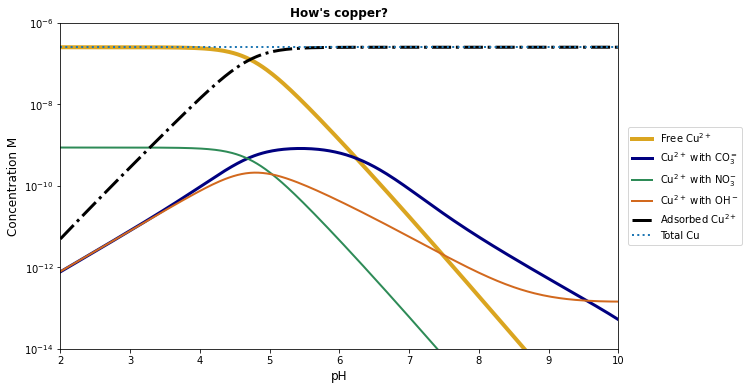

In [4]:
# Initialize plot for surface sites "speciation"
plt.figure(figsize=(10,6),facecolor="white")
plt.plot(pH,Full_Results['Cu++'],label="Free Cu$^{2+}$",lw=4,c='goldenrod') #Free-Copper
#Cu Carbonates
plt.plot(pH,Full_Results['CuCO3']\
         +Full_Results['CuHCO3+']\
         +Full_Results['Cu(CO3)2--']\
         +Full_Results['Cu(CO3)3----']\
         +Full_Results['Cu(HCO3)2'],label="Cu$^{2+}$ with CO$_3^=$",lw=3,c='navy')
#Cu Nitrates
plt.plot(pH,Full_Results['CuNO3+']\
         +Full_Results['Cu(NO3)2']\
         +Full_Results['Cu(NO3)3'],label="Cu$^{2+}$ with NO$_3^{-}$",lw=2,c='seagreen')
#Cu Hydroxydes
plt.plot(pH,Full_Results['CuOH+']\
         +Full_Results['CuOH2']\
         +Full_Results['Cu2OH2++'],label="Cu$^{2+}$ with OH$^-$",lw=2,c='chocolate')
#Cu adsorbed
plt.plot(pH,Full_Results['FeOOCu+'],label="Adsorbed Cu$^{2+}$",lw=3,ls='-.',c="black")

#Miscelaneous for plotting
plt.title("How's copper?",size=12,weight='bold')
plt.yscale('log')
plt.ylabel("Concentration M",fontsize="large")
plt.xlabel("pH",fontsize="large")
plt.axhline(y=2.5E-7,label="Total Cu",lw=2,ls="dotted")
plt.ylim(1.0E-14,1.0E-6)
plt.xlim(2,10)
plt.legend(loc=10,bbox_to_anchor=(1.12, 0.5))
plt.show()

### **2.3 Copper Speciation**

The full speciation of copper in solution is plotted below. Many of the considered species are never dominant in the system, however, this plot can be used to check which species is the most important for each of the ligands.  

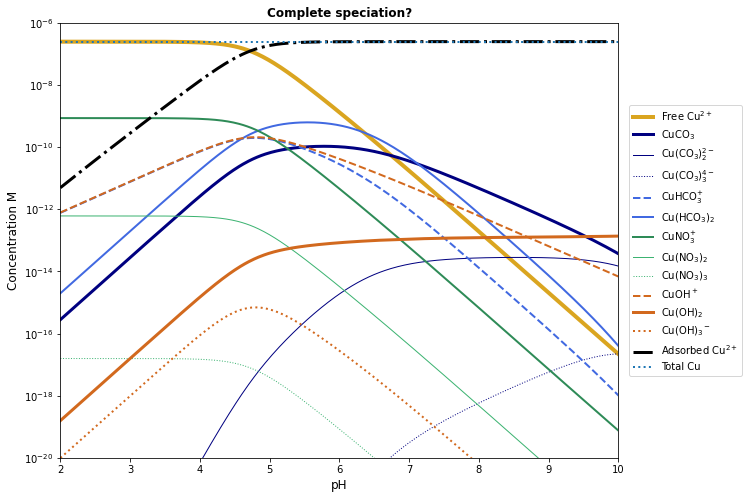

In [5]:
#Initialize figure
plt.figure(figsize=(10,8),facecolor="white")

#Free-Copper
plt.plot(pH,Full_Results['Cu++'],label="Free Cu$^{2+}$",lw=4,c='goldenrod')

#Cu Carbonates
plt.plot(pH,Full_Results['CuCO3'],label="CuCO$_3$",lw=3,c='navy')
plt.plot(pH,Full_Results['Cu(CO3)2--'],label="Cu(CO$_3$)$_2^{2-}$",lw=1,c='navy')
plt.plot(pH,Full_Results['Cu(CO3)3----'],label="Cu(CO$_3$)$_3^{4-}$",lw=1,c='navy',ls='dotted')
plt.plot(pH,Full_Results['CuHCO3+'],label="CuHCO$_3^{+}$",lw=2,c='royalblue',ls='dashed')
plt.plot(pH,Full_Results['Cu(HCO3)2'],label="Cu(HCO$_3$)$_2$",lw=2,c='royalblue',ls='-')

#Cu Nitrates
plt.plot(pH,Full_Results['CuNO3+'],label="CuNO$_3^{+}$",lw=2,c='seagreen')
plt.plot(pH,Full_Results['Cu(NO3)2'],label="Cu(NO$_3$)$_2$",lw=1,c='mediumseagreen')
plt.plot(pH,Full_Results['Cu(NO3)3'],label="Cu(NO$_3$)$_3$",lw=1,c='mediumseagreen',ls='dotted')

#Cu Hydroxydes
plt.plot(pH,Full_Results['CuOH+'],label="CuOH$^+$",lw=2,c='chocolate',ls='dashed')
plt.plot(pH,Full_Results['CuOH2'],label="Cu(OH)$_2$",lw=3,c='chocolate')
plt.plot(pH,Full_Results['Cu2OH2++'],label="Cu(OH)$_3$$^-$",lw=2,c='chocolate',ls='dotted')

#Cu adsorbed
plt.plot(pH,Full_Results['FeOOCu+'],label="Adsorbed Cu$^{2+}$",lw=3,ls='-.',c="black")

#Miscellaneous for plotting
plt.title("Complete speciation?",size=12,weight='bold')
plt.yscale('log')
plt.ylabel("Concentration M",fontsize="large")
plt.xlabel("pH",fontsize="large")
plt.axhline(y=2.5E-7,label="Total Cu",lw=2,ls="dotted")
plt.ylim(1.0E-20,1.0E-6)
plt.xlim(2,10)
plt.legend(loc=10,bbox_to_anchor=(1.12, 0.5))
plt.show()

************

**What if there were no carbonates in the system?**

$\boxed{\text{Consider a mixture of Cu$^{2+}$ and KNO$_3$}}$

**Recipe**
- TOT$_{\rm Cu^{2+}}$ = $2.5\times 10^{-7}$ M
- [KNO$_3$] = $1.0\times 10^{-3}$ M

**Matrix for solving in ChemEQL**

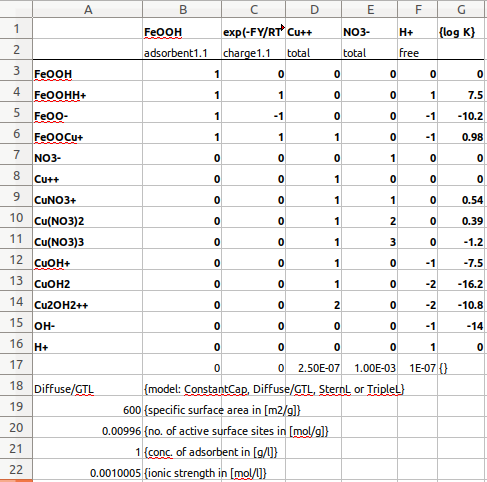

Just as before, a ChemEQL matrix is set in a spreadsheet with the species of interest. Notice that the ionic strenght in this case is lower because we have removed one of the salts from the solution. The results of ChemEQL calculations are load to the notebook with the code below:

In [6]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Full_Results = pd.read_csv("./ResultsAdsorption_OnlyNO3.xls",sep="\t");
pH = Full_Results['-log H+']

The same set of plots described before are drawn for this case

**Surface sites**

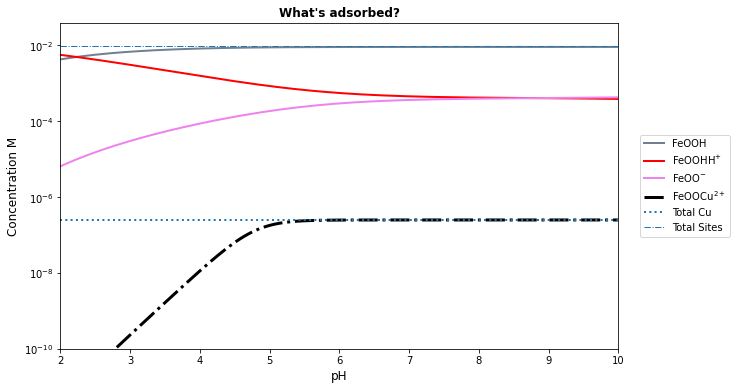

In [7]:
#Initialize plot
plt.figure(figsize=(10,6),facecolor="white")
plt.plot(pH,Full_Results['FeOOH'],label="FeOOH",lw=2,c='slategray') #Neutral HFO
plt.plot(pH,Full_Results['FeOOHH+'],label="FeOOHH$^{+}$",lw=2,c='red') #Protonated HFO
plt.plot(pH,Full_Results['FeOO-'],label="FeOO$^{-}$",lw=2,c='violet') #Deprotonated HFO
plt.plot(pH,Full_Results['FeOOCu+'],label="FeOOCu$^{2+}$",lw=3,ls='-.',c="black")#Cu adsorbed to HFO

#Miscellaneous for plotting
plt.title("What's adsorbed?",size=12,weight='bold')
plt.yscale('log')
plt.ylabel("Concentration M",fontsize="large")
plt.xlabel("pH",fontsize="large")
plt.axhline(y=2.5E-7,label="Total Cu",lw=2,ls="dotted")
plt.axhline(y=9.96E-3,label="Total Sites",lw=1,ls="-.")
plt.ylim(1.0E-10,4.0E-2)
plt.xlim(2,10)
plt.legend(loc=10,bbox_to_anchor=(1.12, 0.5))
plt.show()

**Adsorbed copper**

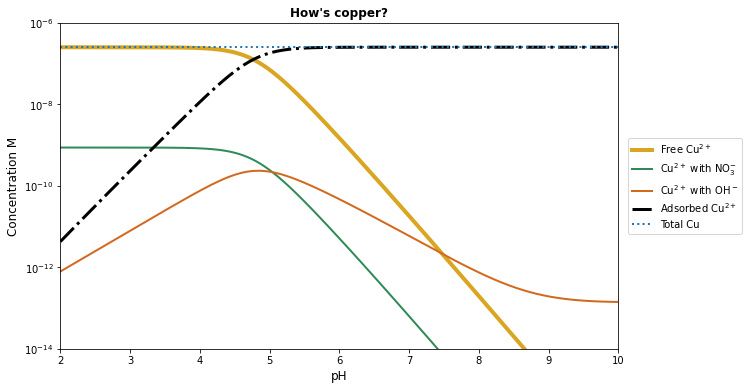

In [8]:
#Initialize plot
plt.figure(figsize=(10,6),facecolor="white")
plt.plot(pH,Full_Results['Cu++'],label="Free Cu$^{2+}$",lw=4,c='goldenrod') #Free-Copper
#Cu Nitrates
plt.plot(pH,Full_Results['CuNO3+']\
         +Full_Results['Cu(NO3)2']\
         +Full_Results['Cu(NO3)3'],label="Cu$^{2+}$ with NO$_3^{-}$",lw=2,c='seagreen')
#Cu Hydroxydes
plt.plot(pH,Full_Results['CuOH+']\
         +Full_Results['CuOH2']\
         +Full_Results['Cu2OH2++'],label="Cu$^{2+}$ with OH$^-$",lw=2,c='chocolate')
#Cu adsorbed
plt.plot(pH,Full_Results['FeOOCu+'],label="Adsorbed Cu$^{2+}$",lw=3,ls='-.',c="black")

#Miscellaneous for plotting
plt.title("How's copper?",size=12,weight='bold')
plt.yscale('log')
plt.ylabel("Concentration M",fontsize="large")
plt.xlabel("pH",fontsize="large")
plt.axhline(y=2.5E-7,label="Total Cu",lw=2,ls="dotted")
plt.ylim(1.0E-14,1.0E-6)
plt.xlim(2,10)
plt.legend(loc=10,bbox_to_anchor=(1.12, 0.5))
plt.show()

**Copper speciation**

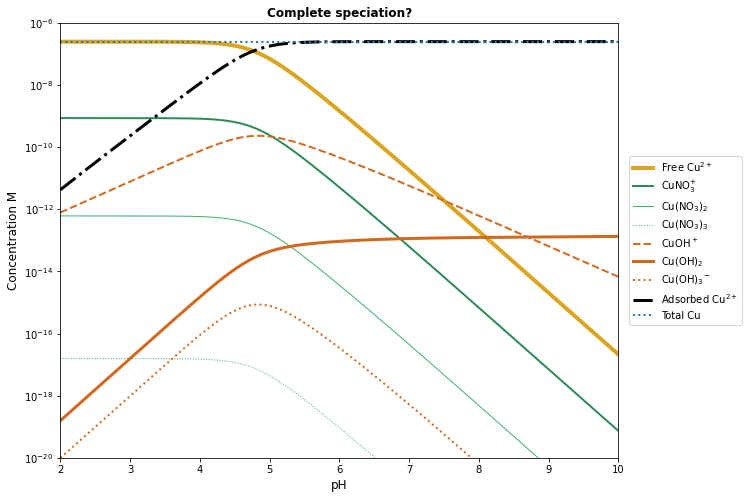

In [9]:
#Initialize figure
fig = plt.figure(figsize=(10,8),facecolor="white")

#Free-Copper
plt.plot(pH,Full_Results['Cu++'],label="Free Cu$^{2+}$",lw=4,c='goldenrod')

#Cu Nitrates
plt.plot(pH,Full_Results['CuNO3+'],label="CuNO$_3^{+}$",lw=2,c='seagreen')
plt.plot(pH,Full_Results['Cu(NO3)2'],label="Cu(NO$_3$)$_2$",lw=1,c='mediumseagreen')
plt.plot(pH,Full_Results['Cu(NO3)3'],label="Cu(NO$_3$)$_3$",lw=1,c='mediumseagreen',ls='dotted')

#Cu Hydroxydes
plt.plot(pH,Full_Results['CuOH+'],label="CuOH$^+$",lw=2,c='chocolate',ls='dashed')
plt.plot(pH,Full_Results['CuOH2'],label="Cu(OH)$_2$",lw=3,c='chocolate')
plt.plot(pH,Full_Results['Cu2OH2++'],label="Cu(OH)$_3$$^-$",lw=2,c='chocolate',ls='dotted')

#Cu adsorbed
plt.plot(pH,Full_Results['FeOOCu+'],label="Adsorbed Cu$^{2+}$",lw=3,ls='-.',c="black")

#Miscellaneous for plotting
plt.title("Complete speciation?",size=12,weight='bold')
plt.yscale('log')
plt.ylabel("Concentration M",fontsize="large")
plt.xlabel("pH",fontsize="large")
plt.axhline(y=2.5E-7,label="Total Cu",lw=2,ls="dotted")
plt.ylim(1.0E-20,1.0E-6)
plt.xlim(2,10)
plt.legend(loc=10,bbox_to_anchor=(1.12, 0.5))
plt.show()